 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/CoAx/Git/Pub_Code_master/Analyses/Figures/ModelResults/PosteriorPredictiveDistributions.ipynb#Imports/-Set-Up" data-toc-modified-id="Imports/-Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports/ Set Up</a></span></li><li><span><a href="http://localhost:8888/notebooks/CoAx/Git/Pub_Code_master/Analyses/Figures/ModelResults/PosteriorPredictiveDistributions.ipynb#Definitions" data-toc-modified-id="Definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definitions</a></span></li><li><span><a href="http://localhost:8888/notebooks/CoAx/Git/Pub_Code_master/Analyses/Figures/ModelResults/PosteriorPredictiveDistributions.ipynb#Define-data,-model,-and-sample-parameters-if-needed" data-toc-modified-id="Define-data,-model,-and-sample-parameters-if-needed-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define data, model, and sample parameters if needed</a></span></li><li><span><a href="http://localhost:8888/notebooks/CoAx/Git/Pub_Code_master/Analyses/Figures/ModelResults/PosteriorPredictiveDistributions.ipynb#Get-the-nodes-for-drift-rate-traces" data-toc-modified-id="Get-the-nodes-for-drift-rate-traces-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Get the nodes for drift-rate traces</a></span></li><li><span><a href="http://localhost:8888/notebooks/CoAx/Git/Pub_Code_master/Analyses/Figures/ModelResults/PosteriorPredictiveDistributions.ipynb#Plot-Posterior-Drift-Rate-Distribution" data-toc-modified-id="Plot-Posterior-Drift-Rate-Distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot Posterior Drift Rate Distribution</a></span></li><li><span><a href="http://localhost:8888/notebooks/CoAx/Git/Pub_Code_master/Analyses/Figures/ModelResults/PosteriorPredictiveDistributions.ipynb#Get-nodes-for-starting-point-parameter" data-toc-modified-id="Get-nodes-for-starting-point-parameter-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Get nodes for starting point parameter</a></span></li><li><span><a href="http://localhost:8888/notebooks/CoAx/Git/Pub_Code_master/Analyses/Figures/ModelResults/PosteriorPredictiveDistributions.ipynb#Plot-Posterior-Distribution-for-starting-point" data-toc-modified-id="Plot-Posterior-Distribution-for-starting-point-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plot Posterior Distribution for starting point</a></span></li></ul></div>

## Imports/ Set Up

In [1]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import itertools

# enough with the warnings!
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

# PLOT STYLING
# Display plots in the notebook
%matplotlib inline 

#if you have jupyterthemes:
from jupyterthemes import jtplot
jtplot.style('grade3',context='paper', fscale=1.3)
jtplot.figsize(6, 6, 1.2)
# if you don't have jupyterthemes, but have seaborn you can use:
# sns.set(context='paper', rc={'figure.facecolor':'white'}, font_scale=1.7)

## Definitions

In [2]:
def get_nodes(model, df, param='v', conditions=['variance', 'reward']):

    """ extract posterior distributions from hddm model for given parameter 
    Arguments:
       model is hddm model (after optimization has been run)
       df is the data you provided to the model when initializing
       param is model parameter to get posteriors for 
       conditions is list of exp. conditions param depends on
    Returns:
        list of stochastic nodes (with MCMC samples for param in each combination of conditions)
    """
    if len(conditions) > 1:    
        levels = [df[c].unique().tolist() for c in conditions]
        combined_lvls = list(itertools.product(*levels))
        nodes = ['{}{}'.format(param, str(lvls)) for lvls in combined_lvls]
        nodes = [node.replace(', ','.') for node in nodes]
    else:
        conditions = conditions[0]
        levels = df[conditions].unique().tolist()
        levels.sort()
        nodes = ['{}({})'.format(param, str(lvl)) for lvl in levels]
    return model.nodes_db.node[nodes] 
    
def compare_posteriors(cond1, cond2):
    """ compare posterior distributions for a parameter across conditions
    Arguments:
        cond1 and cond2 are each stochastic nodes 
            (from list of nodes returned by get_nodes()
    """
    mass_lt_zero = (cond1.trace() < cond2.trace()).mean()
    print("P(c1 < c2) = {:.6f}".format(mass_lt_zero))
    return mass_lt_zero

## Define data, model, and sample parameters if needed 

In [3]:
# Run the model if you don't have access to the parameters
#imports
import hddm
data = hddm.load_csv('D:/Rory/CoAx/Git/Pub_Code_master/Data/exp1data.csv')
#data grooming, remove fast outliers
rtSig = data.rt.std()
rtMu = data.rt.mean()
cutoff =  rtMu - rtSig
data = data[data.rt>cutoff]
data.reset_index(drop=True, inplace=True)
#build model
model = hddm.HDDM(data,depends_on={'v':['rwd_pen','stableVar'],'z':'rwd_pen'}, bias=True,
                        include=['v','a','t','z'], p_outlier=0.05)
model.find_starting_values()
model.sample(3000, burn=1000) # test right now

C:\Users\Rory\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)
C:\Users\Rory\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\Rory\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 3001 of 3000 complete in 1762.4 sec

C:\Users\Rory\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


## Get the nodes for drift-rate traces

In [4]:
df = pd.read_csv('D:/Rory/CoAx/Git/Pub_Code_master/Data/exp1data.csv')
param = 'v'
conditions = ['rwd_pen','stableVar']
ns = get_nodes(model, df, param, conditions) # only for v

## Plot Posterior Drift Rate Distribution

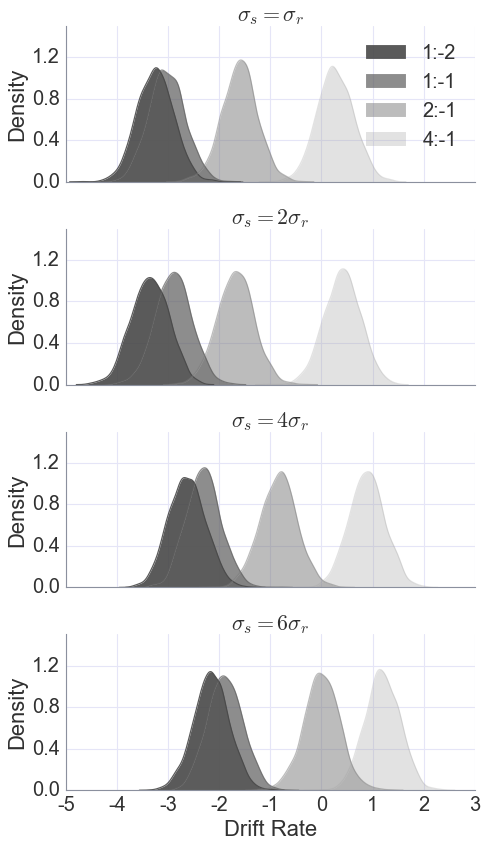

In [5]:
figs, axs = plt.subplots(4,1,sharex=True, figsize=(7,12))

cdict = sns.color_palette('Greys_d',4)
alphas = [.9,.7,.5,.3]
rps = [0,1,2,3]
vs = ['','2','4','6']
v = 0
for ax in axs:
    for rp in rps:
        sns.kdeplot(model['v(%i.%%i)'%rp%v].trace(), ax=ax,
                    shade=True, color=cdict[rp], alpha=alphas[rp]);
        ax.set_yticks(np.linspace(0,1.2,4))
        ax.set_yticklabels(np.linspace(0,1.2,4), fontsize=20)
        ax.set_ylim([0,1.5])
        ax.set_ylabel('Density', fontsize=22)
        ax.set_title('$\sigma_s = %s\sigma_r$'%vs[v], fontsize=22)
        
    if v == 0:
        ax.legend(['1:-2','1:-1','2:-1','4:-1'], loc='best', fontsize=20)
    if v == 3:
        ax.set_xlabel('Drift Rate', fontsize=22)
        ax.set_xticklabels(np.linspace(-5,3,9,dtype=int),fontsize=20)
        
    v += 1
sns.despine(top=True, right=True)
figs.savefig('driftrates_byvar.png')
figs.savefig('driftrates_byvar.eps')
figs.savefig('driftrates_byvar.svg')

In [1]:
# If you want to test hypothesis on the posteriors
#compare_posteriors(ns['v(0.0)'],ns['v(0.3)']);

## Get nodes for starting point parameter 

In [6]:
param='z'
conditions= ['stableVar']
ns = get_nodes(model, df, param, conditions)
ns

z(0)    z(0)
z(1)    z(1)
z(2)    z(2)
z(3)    z(3)
Name: node, dtype: object

## Plot Posterior Distribution for starting point 

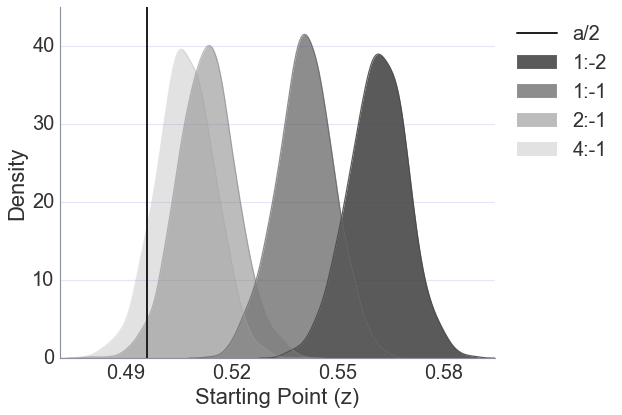

In [9]:
plt.figure()
for rp in range(4):
    ax = sns.kdeplot(model['%s'%ns[rp]].trace(),
               shade=True, color = cdict[rp], alpha=alphas[rp])
ax.set_xlabel('Starting Point (z)', fontsize=22)
ax.set_xticks(np.linspace(.46,.64,6))
ax.set_xticklabels(np.linspace(.46,.64,7), fontsize=20)
ax.set_yticks(np.linspace(0,40,5))
ax.set_yticklabels(np.linspace(0,40,5, dtype=int) ,fontsize=20)
ax.set_ylabel('Density',fontsize=22)
sns.despine(top=True,right=True)
plt.grid(axis='x');
plt.plot([model.values['a']/2, model.values['a']/2],[0, 45], color='k', lw=2);
lgd = plt.legend(['a/2','1:-2','1:-1','2:-1','4:-1'],bbox_to_anchor=(1.3,1), fontsize=20);
plt.savefig('onset_byrp.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('onset_byrp.eps', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.savefig('onset_byrp.svg', bbox_extra_artists=(lgd,), bbox_inches='tight')